# Проект «Прогнозирование числа стримов для музыкальных треков»


## Часть 3. Проверка гипотез

Во второй части исследования мы предположили, что одним из вариантов гипотезы можно рассмотреть корреляцию между связками параметров и влиянием на количество стримов. Наша задача понять, увеличится ли корреляция между параметрами и стримами, если мы будем брать связку параметров.

Ранее, когда мы проверяли корреляцию попарно - количество стримов с каждой перемнной - то самое высокое значение корреляции было 0.11 с переменной loudness.

Для начала посмотрим, между какими комбинациями параметров в целом есть связь с количеством стримов. Ранее в п.2.7.2 мы уже проверяли попарную корреляцию между параметрами и стримами, но делали это по раздельности с каждым параметром.

Мы уже прологарифмировали целевую переменную stream и отобрали список числовых параметров (без stream и stream_log):

In [ ]:
num_cols

['danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_min']

Выведем зависимости между комбинацией переменных и стримов. Будем проверять корреляцию признаков через произведение и сумму.

Сделаем это для выявления потенциальных взаимодействий между признаками, которые могут не улавливаться при рассмотрении признаков по отдельности.

Рассмотрим произведение и сумму ввиду следующих особенностей:

Произведение (для поиска мультипликативных взаимодействий)

1) Когда мы перемножаем два признака, мы создаем новый признак, значение которого становится большим, только если оба исходных признака имеют высокие значения. Если один из признаков имеет низкое значение, то и произведение будет низким, независимо от значения другого признака.

2) Произведение позволяет моделировать ситуации, когда совместное влияние двух признаков на целевую переменную ('stream_log') отличается от суммы их индивидуальных влияний.

Сумма (для поиска аддитивных взаимодействий или простого комбинирования):

1) Суммирование двух признаков создает новый признак, значение которого увеличивается, если хотя бы один из исходных признаков имеет высокое значение.

Применение этих двух процессов может дать модели больше информации о сложных взаимосвязях в данных и помочь лучше понять закономерности и сделать более точные прогнозы.


In [ ]:
#импортируем нужную библиотеку

import itertools

In [ ]:
# создадим словарь для хранения результатов через произведение
correlations_mult = []

# перебираем все возможные пары параметров
for feat1, feat2 in itertools.combinations(num_cols, 2):

    #cоздаем комбинацию параметров
    spotify_numeric[f'{feat1}_x_{feat2}'] = spotify_numeric[feat1] * spotify_numeric[feat2]

    #вычисляем корреляцию с логарифмом стримов
    corr_value = spotify_numeric[f'{feat1}_x_{feat2}'].corr(spotify_numeric['stream_log'])

    # применяем функцию
    correlations_mult.append({
        'parameter_pair': f'{feat1} x {feat2}',
        'correlation': corr_value
    })

    #удаляем временный столбец
    spotify_numeric.drop(f'{feat1}_x_{feat2}', axis=1, inplace=True)

In [ ]:
# создадим словарь для хранения результатов через сумму
correlations_sum = []

# перебираем все возможные пары параметров
for feat1, feat2 in itertools.combinations(num_cols, 2):

    #cоздаем комбинацию параметров
    spotify_numeric[f'{feat1}_plus_{feat2}'] = spotify_numeric[feat1] + spotify_numeric[feat2]

    #вычисляем корреляцию с логарифмом стримов
    corr_value = spotify_numeric[f'{feat1}_plus_{feat2}'].corr(spotify_numeric['stream_log'])

    # применяем функцию
    correlations_sum.append({
        'parameter_pair': f'{feat1} + {feat2}',
        'correlation': corr_value
    })

    #удаляем временный столбец
    spotify_numeric.drop(f'{feat1}_plus_{feat2}', axis=1, inplace=True)

In [ ]:
#запишем полученные результаты умножения в датафрейм и отсортируем по абсолютному значению корреляции
correlation_data_mul = pd.DataFrame(correlations_mult)
correlation_data_mul['abs_correlation'] = correlation_data_mul['correlation'].abs()
correlation_data_mul.sort_values('abs_correlation', ascending=False, inplace=True)

In [ ]:
#возьмем ТОП-10 комбинаций с умножением

print('Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов:')
correlation_data_mul.head(10).reset_index(drop=True)

Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов:


,parameter_pair,correlation,abs_correlation
0,loudness x acousticness,0.132519,0.132519
1,loudness x instrumentalness,0.125155,0.125155
2,instrumentalness x tempo,-0.123897,0.123897
3,acousticness x instrumentalness,-0.119826,0.119826
4,danceability x instrumentalness,-0.117467,0.117467
5,loudness x tempo,0.116352,0.116352
6,key x instrumentalness,-0.111951,0.111951
7,instrumentalness x liveness,-0.109260,0.109260
8,speechiness x instrumentalness,-0.107538,0.107538
9,instrumentalness x duration_min,-0.106139,0.106139


In [ ]:
#запишем полученные результаты сложения в датафрейм и отсортируем по абсолютному значению корреляции
correlation_data_sum = pd.DataFrame(correlations_sum)
correlation_data_sum['abs_correlation'] = correlation_data_sum['correlation'].abs()
correlation_data_sum.sort_values('abs_correlation', ascending=False, inplace=True)

In [ ]:
#возьмем ТОП-10 комбинаций сложения

print('Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов:')
correlation_data_sum.head(10).reset_index(drop=True)

Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов:


,parameter_pair,correlation,abs_correlation
0,loudness + duration_min,0.152255,0.152255
1,acousticness + instrumentalness,-0.146654,0.146654
2,danceability + loudness,0.139265,0.139265
3,loudness + speechiness,0.138278,0.138278
4,loudness + liveness,0.137351,0.137351
5,loudness + acousticness,0.136761,0.136761
6,energy + loudness,0.136640,0.136640
7,loudness + instrumentalness,0.136610,0.136610
8,loudness + valence,0.136369,0.136369
9,speechiness + instrumentalness,-0.135399,0.135399


Самые высокие креляции получились методом сложения, поэтому далее будем работать с результатами этого метода.

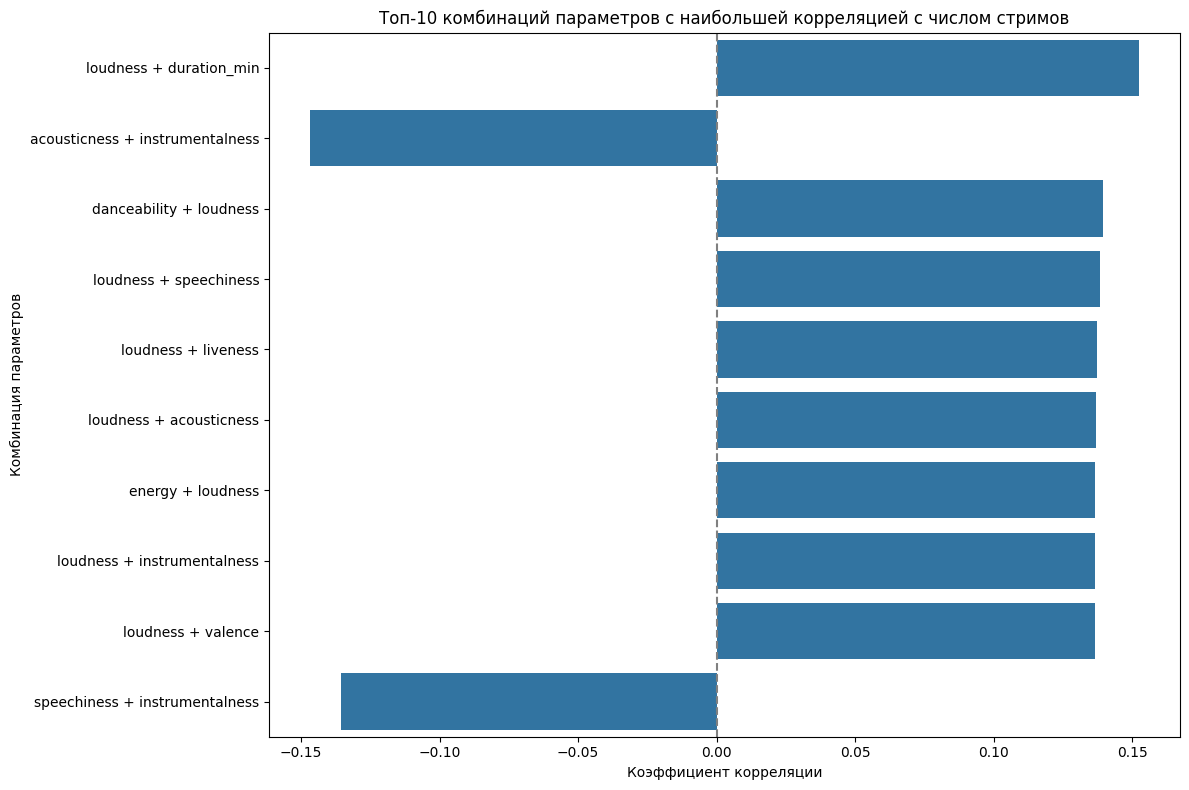

In [ ]:
# визуализируем топ-10 комбинаций параметров с наибольшей корреляцией

plt.figure(figsize=(12, 8))
sns.barplot(x='correlation', y='parameter_pair', data=correlation_data_sum.head(10))
plt.title('Топ-10 комбинаций параметров с наибольшей корреляцией с числом стримов')
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Комбинация параметров')
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

**На основе проведенного анализа мы можем сделать следующие выводы:**

1) Комбинации параметров имеют более сильную корреляцию с числом стримов, чем отдельные параметры. Значения коэффициентов корреляции для ТОП-10 комбинаций параметров (0.13-0.15) выше, чем для отдельных параметров (ранее не более 0.11).

2) Наиболее значимой оказалась комбинация loudness + duration_min с коэффициентом корреляции 0.15. Это довольно интересное наблюдение, так как по отдельности эти параметры показывали более слабую корреляцию со стримами (0.11 и 0.02 соответственно). Можно предположить, что слушатели предпочитают достаточно продолжительные и при этом громкие, хорошо сведенные треки.

3) Параметр loudness чаще всего коррелирует с другими параметрами (7 из 10). Это может говорить о том, что техническое качество звучания трека важно для его успеха.

4) Большинство комбинаций используют суммирование параметров, а не их произведение, что может указывать на то, что при построении модели прогнозирования стоит рассматривать именно линейные комбинации параметров.

5) Большинство комбинаций имеет положительную корреляцию, что указывает на то, что определенные пары параметров действительно могут усиливать потенциал популярности трека.

6) Параметры speechiness и instrumentalness в комбинации показывают отрицательную корреляцию (-0.14), что может указывать на низкую популярность треков, которые сочетают разговорную речь и инструментальность.

*Теперь проведем статистический анализ полученных результатов.*

Для проверки статистической значимости выявленных корреляций возьмем тест Пирсона. Этот тест позволяет определить, является ли наблюдаемая корреляция результатом случайности или действительно отражает существующую в генеральной совокупности взаимосвязь.

Также использование теста Пирсона является стандартным способом оценки линейной корреляции между непрерывными признаками и определения статистической значимости этой корреляции. А как мы ранее выявили, большинство комбинаций имеют максимальное значение через суммирование, а значит имеют линейную связь. Тест Пирсона позволяет выявить, какие из созданных комбинаций признаков имеют значимую линейную связь с логарифмом количества прослушиваний, что может быть полезно для дальнейшего построения модели.

Порог значимости установим на уровне 0.05, что является общепринятым стандартом в статистических исследованиях.

Возьмем следующие нулевую и альтернативную гипотезы:

- **H0 (нулевая гипотеза)** - корреляция между комбинацией параметров и числом стримов равна 0 (отсутствует).

- **H1 (альтернативная гипотеза)** - корреляция между комбинацией параметров и числом стримов не равна 0 (существует).

In [ ]:
#импортируем библиотеку

import scipy.stats as stats

In [ ]:
# возьмем функцию для расчета p-значения для коэффициента корреляции Пирсона
def calculate_pvalue(r, n):

    # рассчитываем t-статистику для корреляции
    t = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

    # рассчитываем p-значение (двустороннее)
    p = 2 * (1 - stats.t.cdf(abs(t), n - 2))
    return p

In [ ]:
# вычисляем размер выборки

size = len(spotify_numeric)
size

18964

In [ ]:
# добавим p-значения к нашим результатам
correlation_data_sum['p_value'] = correlation_data_sum['correlation'].apply(
    lambda r: calculate_pvalue(r, size)
)

In [ ]:
# добавим статистическую значимость (при p < 0.05)
correlation_data_sum['significant'] = correlation_data_sum['p_value'] < 0.05

In [ ]:
# выведем результаты для топ-10 комбинаций

print('Статистический анализ топ-10 комбинаций параметров:')
result = correlation_data_sum.head(10)[['parameter_pair', 'correlation', 'p_value', 'significant']]
result['p_value'] = result['p_value'].apply(lambda p: f"{p:.10f}")
result.reset_index(drop = True)

Статистический анализ топ-10 комбинаций параметров:


,parameter_pair,correlation,p_value,significant
0,loudness + duration_min,0.152255,0.0000000000,True
1,acousticness + instrumentalness,-0.146654,0.0000000000,True
2,danceability + loudness,0.139265,0.0000000000,True
3,loudness + speechiness,0.138278,0.0000000000,True
4,loudness + liveness,0.137351,0.0000000000,True
5,loudness + acousticness,0.136761,0.0000000000,True
6,energy + loudness,0.136640,0.0000000000,True
7,loudness + instrumentalness,0.136610,0.0000000000,True
8,loudness + valence,0.136369,0.0000000000,True
9,speechiness + instrumentalness,-0.135399,0.0000000000,True


**На основе проведенного статистического анализа можно сделать следующие выводы:**

1) Все выявленные в ТОП-10 корреляции являются статистически значимыми, поскольку p-значения для всех комбинаций параметров существенно меньше 0.05, а именно равны нулю.

2) Учитывая большой размер выборки (более 18 тыс. наблюдений), даже относительно небольшие значения корреляции (0.13-0.15) становятся статистически значимыми. Это объясняется тем, что в больших выборках легче обнаружить даже слабые эффекты с высокой степенью достоверности.

3) Несмотря на то, что величина корреляций относительно небольшая (0.13-0.15), их статистическая значимость указывает на то, что при построении прогностических моделей комбинации параметров могут быть полезными предикторами для числа стримов.

Таким образом, статистический анализ подтвердил исходную гипотезу о том, что существует статистически значимая зависимость между числом стримов и комбинациями музыкальных параметров, т.е. мы отклоняем нулевую гипотезу. Ранее, когда мы рассматривали параметры по одиночке, максимальная корреляция была 0.11, а в совокупности параметров - максимальная кореляция уже 0.15.

Возможно, комбинация 3-х и более параметров со стримами могла дать еще большую корреляцию.